In [2]:
import pandas as pd

# Завантаження датасету
file_path = "data2.csv"
df = pd.read_csv(file_path)

# Перегляд перших рядків
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Видалення зайвої колонки
df = df.drop(columns=["Unnamed: 32", "id"])

# Перекодування цільової змінної
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])  # M → 1, B → 0

# Поділ на ознаки та цільову змінну
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Перевірка розмірів вибірок
X_train.shape, X_test.shape


((455, 30), (114, 30))

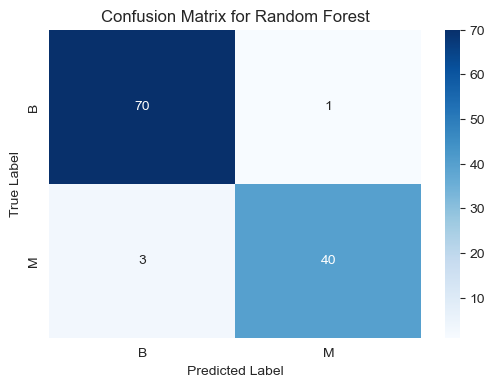

(0.9649122807017544, 0.975609756097561, 0.9302325581395349, 0.9523809523809523)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Створення та навчання моделі Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозування
y_pred = rf_model.predict(X_test)

# Оцінка якості моделі
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Матриця невідповідностей
conf_matrix = confusion_matrix(y_test, y_pred)

# Візуалізація матриці невідповідностей
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Вивід метрик
accuracy, precision, recall, f1


C:\Users\bohda\AppData\Local\Temp\ipykernel_1124\1571155891.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


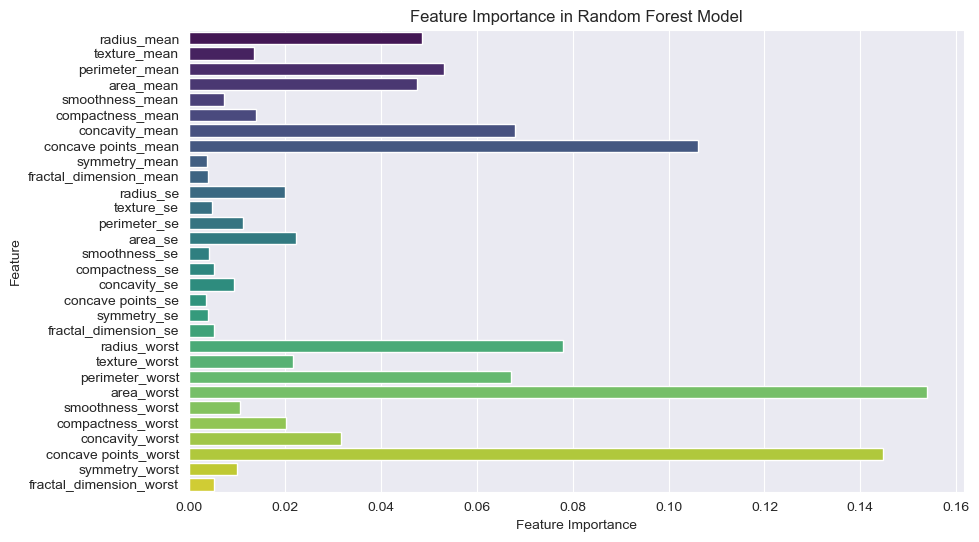

In [5]:
# Отримання важливості ознак
feature_importances = rf_model.feature_importances_
features = X.columns

# Побудова графіка важливості ознак
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()


C:\Users\bohda\AppData\Local\Temp\ipykernel_1124\776687085.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


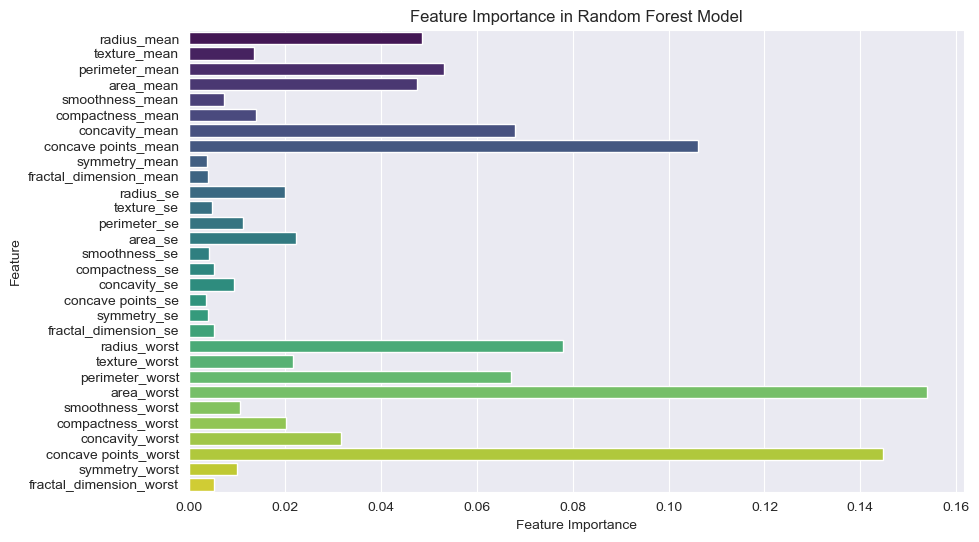

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Отримання важливості ознак
feature_importances = rf_model.feature_importances_
features = X.columns

# Побудова графіка важливості ознак
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Створення моделей
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Словник для збереження результатів
results = {}

# Навчання моделей та оцінка якості
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Feature Importance": model.feature_importances_ if hasattr(model, "feature_importances_") else None
    }

# Вивід порівняльної таблиці результатів
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1-score,Confusion Matrix,Feature Importance
Random Forest,0.964912,0.97561,0.930233,0.952381,"[[70, 1], [3, 40]]","[0.048703371737755234, 0.013590877656998469, 0..."
AdaBoost,0.973684,0.97619,0.953488,0.964706,"[[70, 1], [2, 41]]","[0.0, 0.05920019389955301, 0.0, 0.0, 0.0207978..."
Gradient Boosting,0.95614,0.952381,0.930233,0.941176,"[[69, 2], [3, 40]]","[6.0346242989037746e-05, 0.027820455380317355,..."
